In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('C:\\Users\\caiof\\OneDrive\\Área de Trabalho\\dados\\dados_estudantes.csv')

In [3]:
dados.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [4]:
#Vamos criar um modelo para prever a evasao da faculdade

In [5]:
dados.info()
#Verificando os dados e com esse código da para verificar se tem dados nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [6]:
dados['Target'].unique()
#Verificando os valores únicos da coluna escolhida

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [7]:
dados.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


Idade média: A idade média dos estudantes na matrícula é de aproximadamente 23 anos, sendo a idade mínima 17 anos e a idade máxima 70 anos.
Taxa de desemprego: A taxa média de desemprego entre os estudantes é de cerca de 11.57%, com valores mínimo e máximo de 7.6% e 16.2%, respectivamente.
Taxa de inflação: A taxa média de inflação é de 1.23%, com valores mínimos de 0.8% e 3.7%.
PIB: O PIB médio dos estudantes é muito baixa, com uma média próxima de 0, com valores mínimo e máximo de -4.06 e 3.5, respectivamente.
Desempenho acadêmico: Os estudantes têm, em média, cerca de 6 disciplinas matriculadas por semestre, com média de notas de 10.64 no primeiro semestre e 10.23 no segundo semestre. A média da disciplinas aprovadas é maior no primeiro semestre (4.7) em comparação com o segundo semestre (4.3).

Esses insigths sugerem uma diversidade significativa entre os estudantes em termos de idade, desempenho acadêmico e contexto econômico. A compreensão dessas variabilidades pode ser útil para a tomada de decisão e políticas educacionais.

In [8]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']

dados[colunas_categoricas].describe()


,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


O resultado revela insigths sobre o perfil dos estudantes. A maioria deles são solteiros, do sexo feminino, não é estrangeiro, nem possui necessidades educacionais especiais. A maior parte não é devedora, está com as taxas de matrícula em dia e não é bolsista. O curso mais comum é Enfermagem e a maioria dos estudantes está no período diurno. Em relação a qualificação prévia, a maioria possui em educação segundária (ensino médio). Qunato ao status 'Target', a maioria dos estudandtes estão como graduados.

In [9]:
dados['Estado civil'].value_counts(normalize = True) * 100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

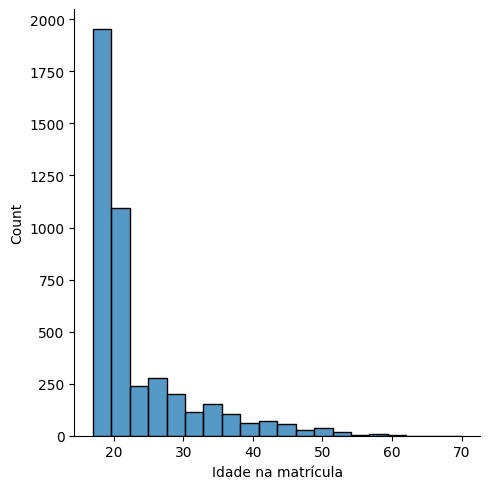

In [11]:
sns.displot(dados['Idade na matrícula'], bins = 20)
plt.show()

In [12]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

#Pode-se observar que a maior quantidade de matriculados são menores de 20 anos.

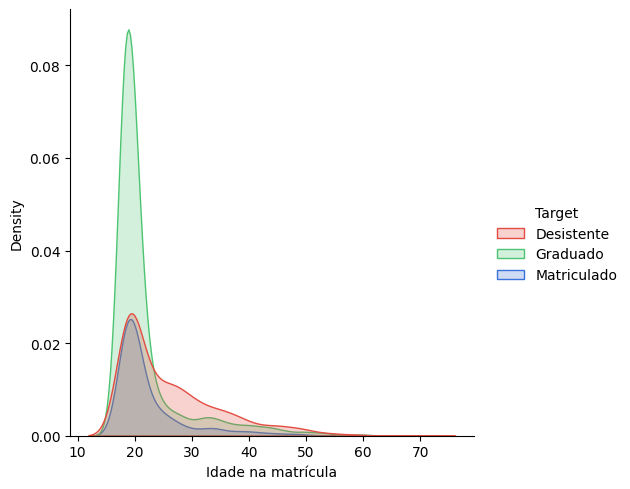

In [13]:
sns.displot(data = dados, x = 'Idade na matrícula', hue = 'Target', kind = 'kde', fill = 'True')
plt.show()

In [14]:
dados['Estrangeiro'].value_counts(normalize = True)

Estrangeiro
Não    0.975136
Sim    0.024864
Name: proportion, dtype: float64

In [15]:
dados['Sexo'].value_counts(normalize = True) *100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

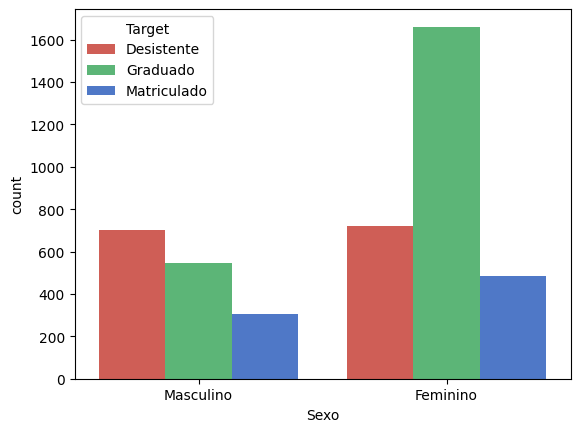

In [16]:
sns.countplot(x = 'Sexo', hue = 'Target', data = dados)
plt.show()

In [17]:
#Podemos observar para esse conjunto de dados que o sexo femino tem mais interesse em realizar o curso. Como tem um volume maior de mulheres no curso há um valor maior na quantidade de mulheres
#graduadas se compararmos com o sexo masculino.

#A maior parte do estudantes masculinos que fazem a matrícula no curso de enfermagem desistem de seguir o curso.

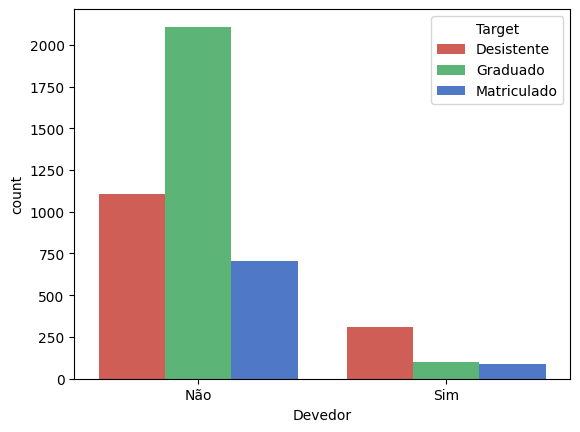

In [18]:
sns.countplot(x = 'Devedor', hue = 'Target', data = dados)
plt.show()

In [19]:
#Podemos observar entre os alunos que estão devendo que a maior parte desses alunos desistem de seguir o curso.


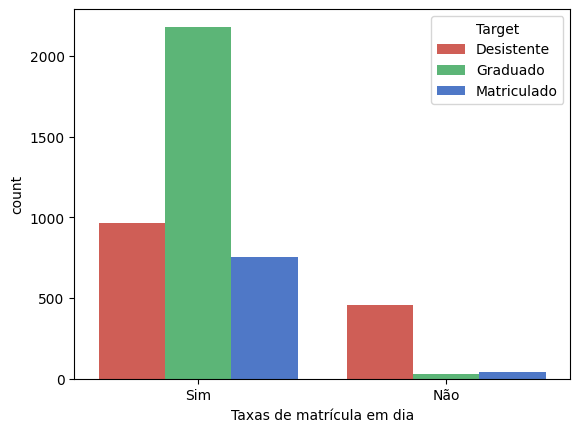

In [20]:
sns.countplot(x = 'Taxas de matrícula em dia', hue = 'Target', data = dados)
plt.show()

In [21]:
#Dentre as pessoas que não estão com a taxa de matrícula em dia, a maior parte desiste do curso.

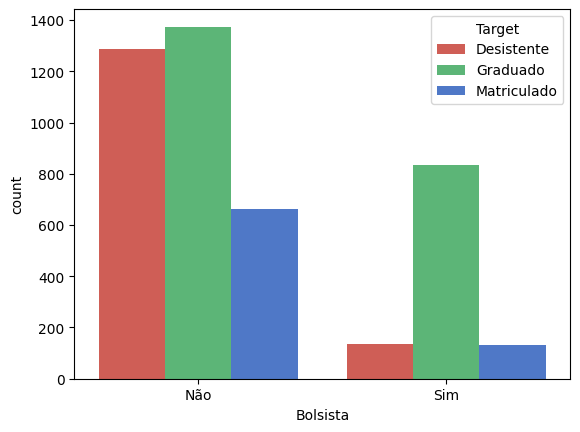

In [22]:
sns.countplot(x = 'Bolsista', hue = 'Target', data = dados)
plt.show()

In [23]:
import plotly.express as px

In [24]:
contagem = dados.groupby(['Curso', 'Target']).size().reset_index(name = 'Contagem')

contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum()) * 100)

fig = px.bar(contagem, y = 'Curso', x = 'Porcentagem', color = 'Target', orientation = 'h',
             color_discrete_map = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})
fig.show()

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [25]:
#POdemos observar que os cursos de zootecnia, tecnologias de produção de biocombustíveis e enfermagem veteriániria tem a maior quantidade de alunos desistentes.
#Há diferenças em desistencias nos mesmos cursos com horários diferentes, podemos verificar que os cursos noturnos tem mais desistencias quando comparado com o curso diurno.

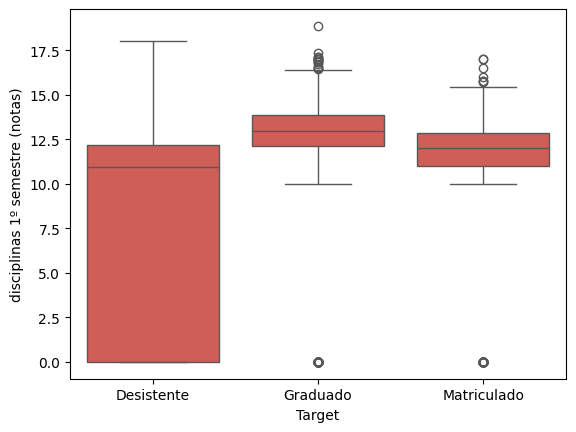

In [26]:
sns.boxplot(x = 'Target', y = 'disciplinas 1º semestre (notas)', data = dados)
plt.show()

In [27]:
#Pode-se observar que as notas baixas estão associadas a desistencia dos alunos no curso.

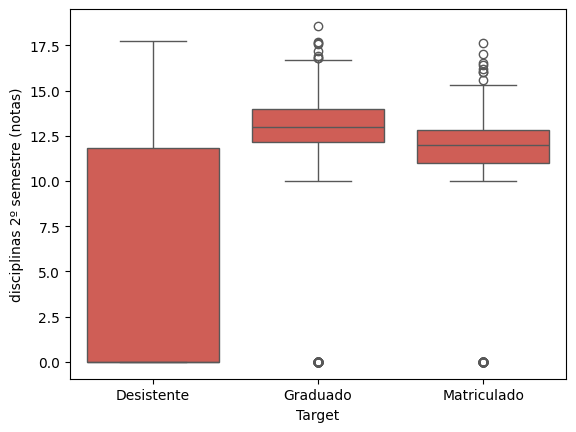

In [28]:
sns.boxplot(x = 'Target', y = 'disciplinas 2º semestre (notas)', data = dados)
plt.show()

In [29]:
#Verificando o balanceamento dos dados
dados['Target'].value_counts(normalize = True) * 100

Target
Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: proportion, dtype: float64

In [30]:
dados.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


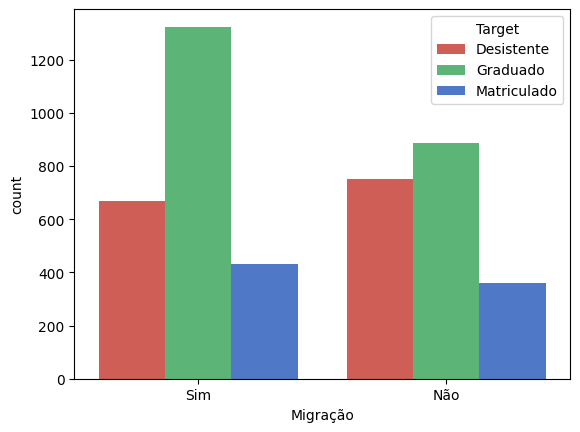

In [31]:
sns.countplot(x = 'Migração', hue = 'Target', data = dados)
plt.show()

Com o resultado da análise, observamos que cada categoria da coluna 'migração' é representada por três barras distintas: a primeira (em vermelho) indica o número de desistentes, a segunda (em verde) representa o número de graduados, e a terceira (em azul) mostra a quantidade de matriculados. Notavelmente, na categoria de Migração "Sim", a quantidade de graduados supera as outras categorias, indicando um alto sucesso no processo educacional. Em contrapartida, na categoria de Migração "Não", as barras de desistentes e graduados são quase equivalentes, sugerindo um desafio na retenção de estudantes nesse contexto específico. Essas informações destacam a importância de estratégia de apoio à permanência dos alunos em instiuições de ensino.

In [32]:
dados['Necessidades educacionais especiais'].value_counts(normalize = True) * 100


Necessidades educacionais especiais
Não    98.847197
Sim     1.152803
Name: proportion, dtype: float64

O resultado mostra que apenas 1.15% dos estudantes possuem necessidades especiáis

In [33]:
dados.groupby('Target')['Necessidades educacionais especiais'].value_counts(normalize = True) * 100

Target       Necessidades educacionais especiais
Desistente   Não                                    98.803659
             Sim                                     1.196341
Graduado     Não                                    98.958805
             Sim                                     1.041195
Matriculado  Não                                    98.614610
             Sim                                     1.385390
Name: proportion, dtype: float64

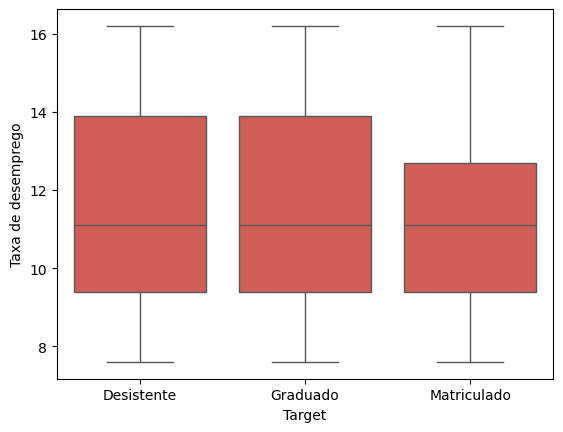

In [34]:
sns.boxplot(x='Target', y='Taxa de desemprego', data = dados)
plt.show()


Ao examinarmos o boxplot de taxa de desemprego, observamos que a amplitude, ou seja, a diferença entre os valores mínimos e máximos, é a mesma em todos os gráficos. Além disso, notamos que a linha que divide a caixa ao meio, representando a mediana, está posicionada de forma semelhante em todos os casos, variando entre 10% e 12%. No entando, há uma distinção notável entra as distribuições. As caixas representam os grupos de "desistentes" e "Graduados" são visualmente idênticas, indicando uma similaridade nas estatísticas centrais desses dois grupos. Por outro lado, a caixa que representa os "Matriculados" possui o quartil de 75% posicionando mais abaixo, sugerindo que a maior parte das taxas de desemprego nesse grupo está concentrado em valores mais baixos, com uma menor dispersão em relação aos outros grupos.

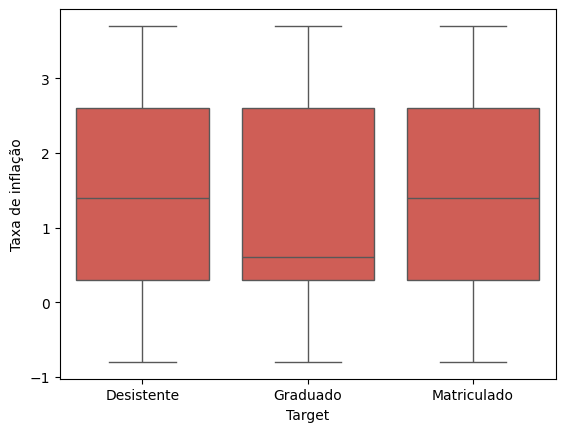

In [35]:
sns.boxplot(x = 'Target', y = 'Taxa de inflação', data = dados)
plt.show()

A análise dos boxplots da taxa de inflação revela alguns padrões interessantes. Primeiramente, notamos que a amplitude, que representa a variação total dos dados, é consistente em todos os grupos, indicando uma faixa semelhante de valores de taxa de inflação em cada caso. Isso sugere que, independentemente da categoria, os valores extremos da taxa de inflação não se afastam muito.

Um ponto de destaque é a similaridade entre as caixas dos grupos "Desistentes" e "Matriculados". Ambos exibem caixas idênticas, com as medianas posicionadas na faixa de 1% a 2%. Isso sugere que esses dois grupos têm comportamentos de taxa de inflação muito semelhantes.

Por outro lado, o grupo "Graduados" se diferencia notavelmente, apresentando uma mediana consideravelmente mais baixa, com menos de 1%. Isso indica que, em média, os "Graduados" enfrentam uma taxa de inflação significativamente inferior em comparação com os outros grupos, o que pode ser indicativo de diferenças econômicas ou comportamentais entre os grupos.

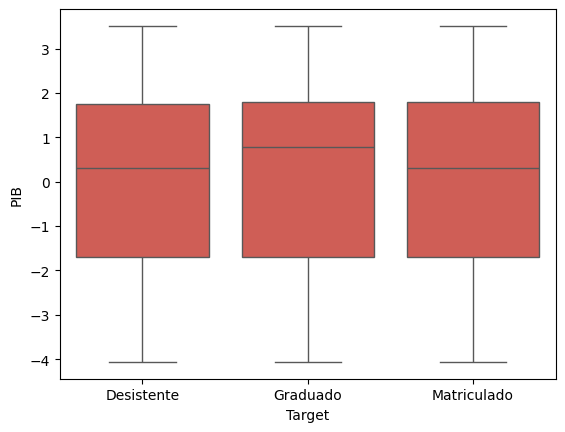

In [36]:
sns.boxplot(x = 'Target', y = 'PIB', data = dados)
plt.show()

A análise dos boxplots referentes ao PIB destaca alguns padrões distintos. Primeiramente, é notável que a amplitude, representando a variação total dos dados, seja consistente em todos os grupos, indicando uma faixa semelhante de valores de PIB em cada caso. No entanto, chama a atenção a similaridade marcante entre os grupos de "Desistentes" e "Matriculados", cujas caixas são praticamente idênticas, e as medianas estão próximas de 0. Essa semelhança sugere que esses dois grupos compartilham tendências econômicas similares. Em contraste, o grupo "Graduados" se destaca com uma mediana mais elevada, próxima de 1, indicando um PIB médio superior.

In [37]:
dados['Qualificação prévia'].value_counts(normalize = True) * 100

Qualificação prévia
Educação secundária                                         84.018987
Curso de especialização tecnológica                          4.950271
Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente     3.661844
Educação superior - licenciatura                             2.848101
Outro - 11º ano de escolaridade                              1.017179
Educação superior - licenciatura (1º ciclo)                  0.904159
Curso técnico superior profissional                          0.813743
Educação superior - bacharelado                              0.519892
Frequência de educação superior                              0.361664
12º ano de escolaridade - não concluído                      0.248644
Educação superior - mestrado                                 0.180832
Educação básica 2º ciclo (6º/7º/8º ano) ou equivalente       0.158228
Educação superior - mestrado (2º ciclo)                      0.135624
11º ano de escolaridade - não concluído                      0.090416


O resultado revela que a maioria das pessoas possui educação secundária, representando 84.02%, enquanto cursos de especialização tecnológica e níveis de educação básica do 3º ciclo seguem com porcentagens de 4.95% e 3.66%, respectivamente. Níveis mais elevados de educação, como licenciaturas e pós-graduações, apresentam percentagens baixas, destacando a predominância da educação secundária entre os estudantes analisados.

In [38]:
#Preparando os dados para o modelo
from sklearn.preprocessing import OneHotEncoder

In [39]:
colunas_categorias = ['Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor', 'Taxas de matrícula em dia', 'Bolsista',
                       'Período', 'Estado civil', 'Curso', 'Qualificação prévia']

In [40]:
#Ajustando as colunas que são categóricas

encoder = OneHotEncoder(drop='if_binary')  

dados_categorico = dados[colunas_categorias]

dados_encoder = pd.DataFrame(encoder.fit_transform(dados_categorico).toarray(),
                             columns = encoder.get_feature_names_out(colunas_categorias))

dados_final = pd.concat([dados.drop(colunas_categorias, axis = 1), dados_encoder], axis = 1)

In [41]:
dados_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X = dados_final.drop('Target', axis = 1)
y = dados_final['Target']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify = y, random_state = 0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
modelo_rf = RandomForestClassifier(random_state = 0)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.9975177304964539
Acurácia de validação: 0.7680851063829788


In [47]:
#O modelo estar com overfit, está ajustando apenas para os dados de treinamento.
#Agora vamos melhorar o modelo

In [48]:
modelo_rf = RandomForestClassifier(random_state = 0, max_depth = 10)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.898936170212766
Acurácia de validação: 0.7734042553191489


In [49]:
#Entendendo a performance do modelo

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [51]:
matriz_confusao = confusion_matrix(y_val, y_pred)

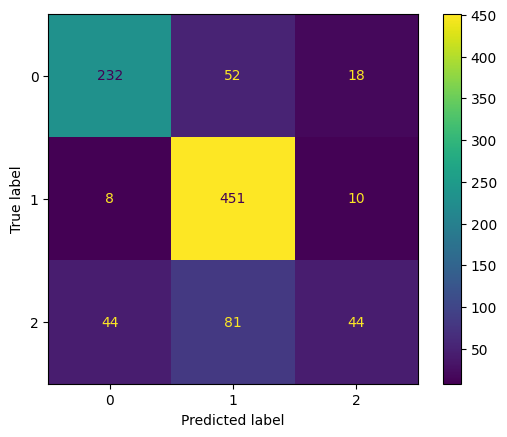

In [52]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

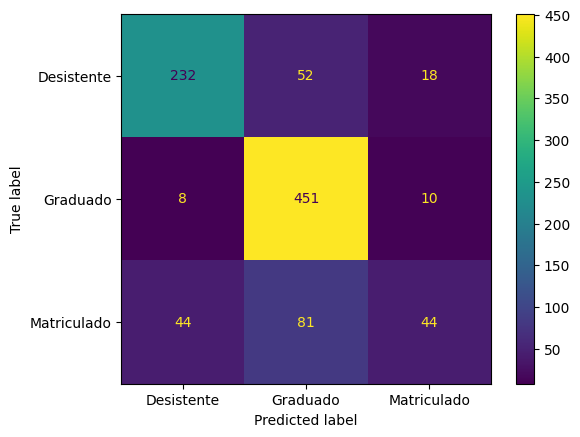

In [53]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = modelo_rf.classes_)
visualizacao.plot();

In [54]:
#intervalos de dados muito discrepantes, vamos normalizar os valors

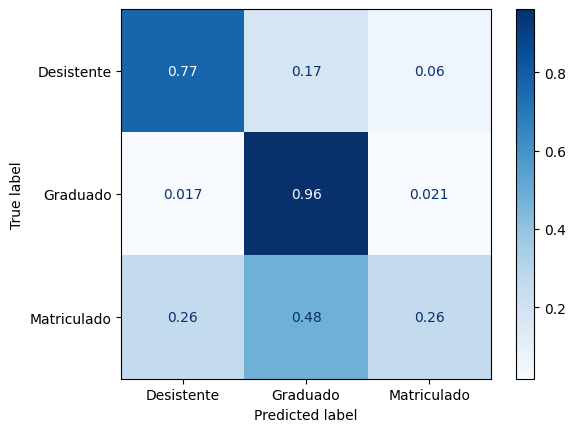

In [55]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues')

In [56]:
from sklearn.metrics import classification_report

In [57]:
report = classification_report(y_val, y_pred)
print('Relatório de Classificação: \n', report)

Relatório de Classificação: 
               precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.61      0.26      0.37       169

    accuracy                           0.77       940
   macro avg       0.73      0.66      0.67       940
weighted avg       0.76      0.77      0.75       940



In [58]:
y_treino.value_counts()

Target
Graduado       1408
Desistente      906
Matriculado     506
Name: count, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
oversample = SMOTE(random_state = 0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [61]:
y_balanceado.value_counts()

Target
Desistente     1408
Graduado       1408
Matriculado    1408
Name: count, dtype: int64

In [62]:
modelo = RandomForestClassifier(random_state = 0, max_depth = 10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.77       302
    Graduado       0.80      0.86      0.83       469
 Matriculado       0.48      0.51      0.49       169

    accuracy                           0.75       940
   macro avg       0.71      0.70      0.70       940
weighted avg       0.76      0.75      0.75       940



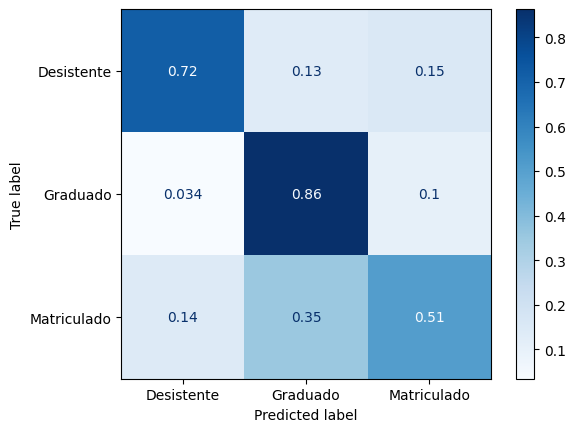

In [63]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues');

Em muitos problemas de aprendizagem de máquina, os conjuntos de dados podem conter classes desbalanceadas, ou seja, uma classe pode ter muito mais exemplos do que outra, como você pode ver no caso do projeto que estamos desenvolvendo aqui. Isso pode ser problemático, pois os modelos de machine learning tendem a ser tendenciosos em direção às classes majoritárias, ignorando as classes minoritárias. Imagine um problema de detecção de fraudes em transações financeiras, onde a classe de transações fraudulentas é geralmente muito menor do que a classe de transações legítimas. Se nós não tratarmos esse desequilíbrio, nosso modelo pode ter um desempenho ruim na detecção de fraudes, que é o que mais nos interessa.

In [64]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_balanceado, y_balanceado)
y_pred = modelo_gb.predict(X_val)


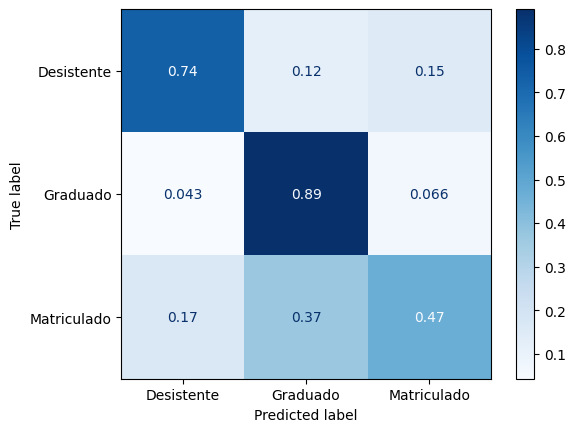

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelo_gb, X_val, y_val, normalize = 'true', cmap = 'Blues');


In [67]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.82      0.74      0.78       302
    Graduado       0.81      0.89      0.85       469
 Matriculado       0.51      0.47      0.49       169

    accuracy                           0.76       940
   macro avg       0.72      0.70      0.70       940
weighted avg       0.76      0.76      0.76       940



In [68]:
#Não podemos balancear os dados de validação

In [69]:
#utilizando uma validação cruzada

from imblearn.pipeline import Pipeline as imbpipeline

In [70]:
modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [72]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [73]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall_weighted')
cv_resultados['test_score']

array([0.76861702, 0.74601064, 0.74335106, 0.76861702, 0.75265957])

In [74]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de Confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

Intervalo de Confiança: [0.7341400727319589, 0.7775620549276154]


In [75]:
 #Testando o modelo

              precision    recall  f1-score   support

  Desistente       0.88      0.73      0.80       213
    Graduado       0.82      0.85      0.83       332
 Matriculado       0.46      0.55      0.50       119

    accuracy                           0.76       664
   macro avg       0.72      0.71      0.71       664
weighted avg       0.77      0.76      0.76       664



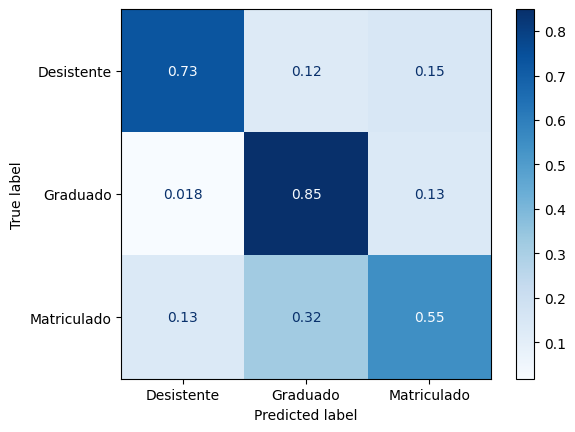

In [77]:
oversample = SMOTE(random_state = 0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state = 0, max_depth = 10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize = 'true', cmap = 'Blues');